# Finding Nemo

In this notebook, I use pre-trained models available in Keras to detect anemone fish/ clownfish (popularized by Disney's 2003 movie as Nemo).

I explore the following pre-trained models, available on Keras:
1. VGG16: A convolutional neural network architecture with 16 layers, including convolutional layers and fully connected layers.
2. VGG19: Similar to VGG16 but has 19 layers. It has a deeper architecture compared to VGG16, which might capture more intricate features in images.
3. ResNet50: A variant of the ResNet (Residual Network) architecture. It introduces residual connections that enable the network to be deeper without suffering from the vanishing gradient problem. ResNet50 has 50 layers and is known for its excellent performance in image classification tasks.
4. Inception V3: Uses a combination of convolutional layers with different filter sizes to capture features at various scales in the image.



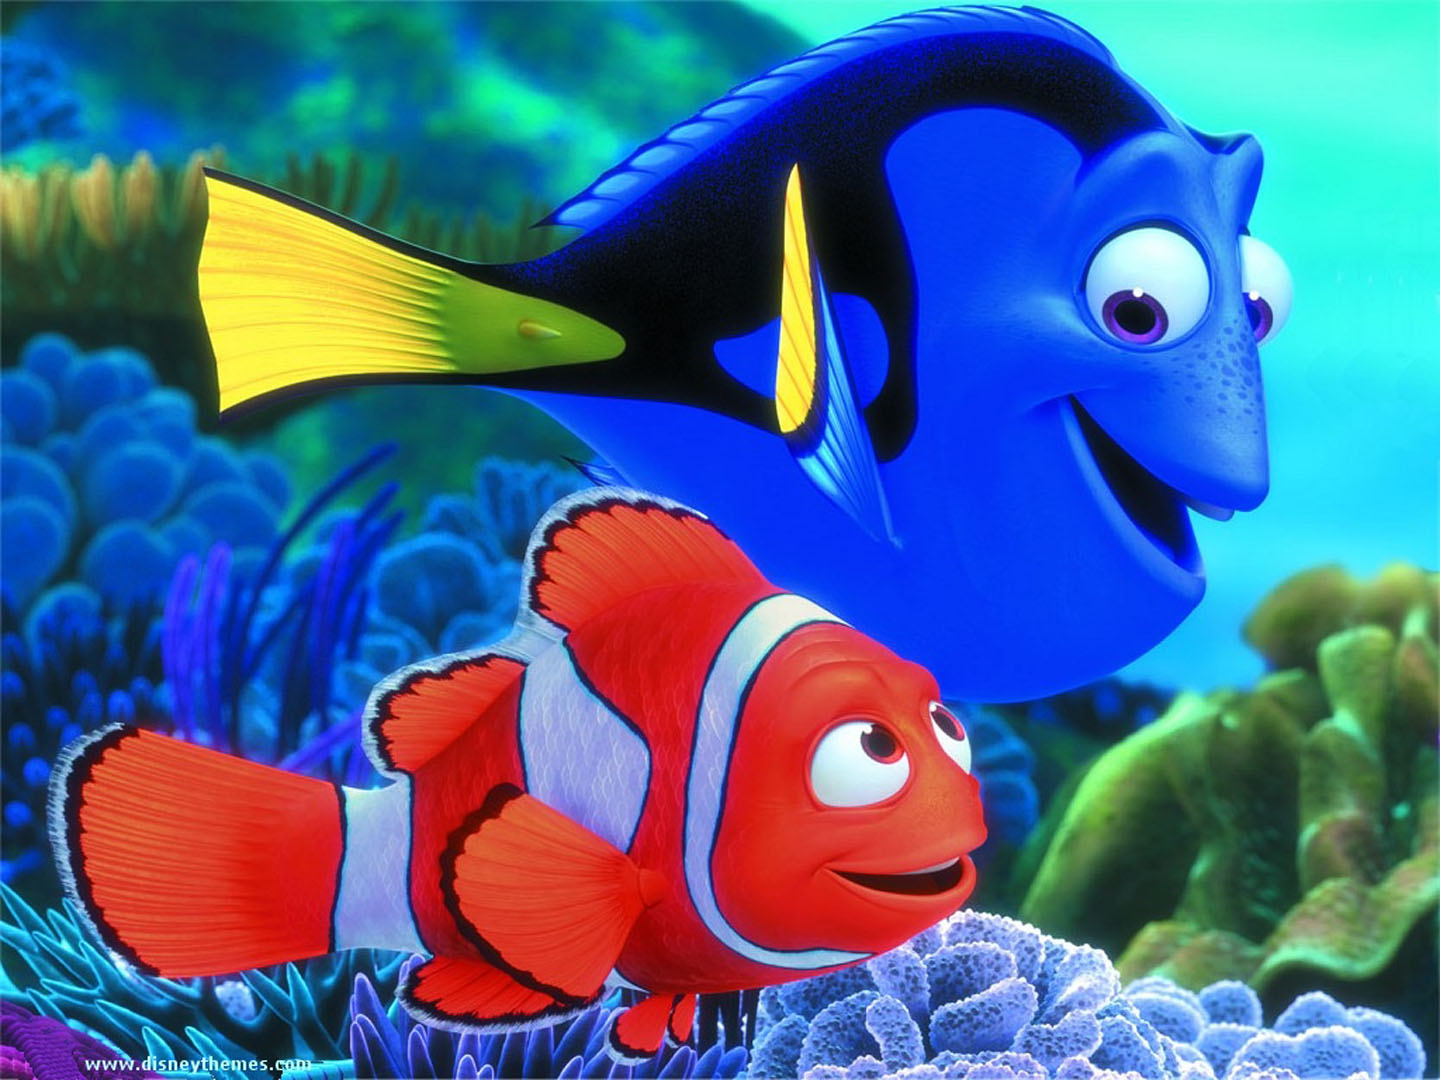

In [82]:
from IPython.display import Image
Image(filename='/content/nemo_poster.jpg', width=400, height=300)

- Load the pre-trained model.
- Preprocess the input images.
- Call `predict()` method to generate predictions
- De-code the predictions using a dedicated post-processing function that is accessible in the model, `decode_predictions()`

In [83]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [84]:
directory_path = '/content/drive/MyDrive/Nemo'

# Get all files in the directory
all_files = os.listdir(directory_path)
image_paths = [os.path.join(directory_path, file) for file in all_files if file.lower().endswith('.jpg')]

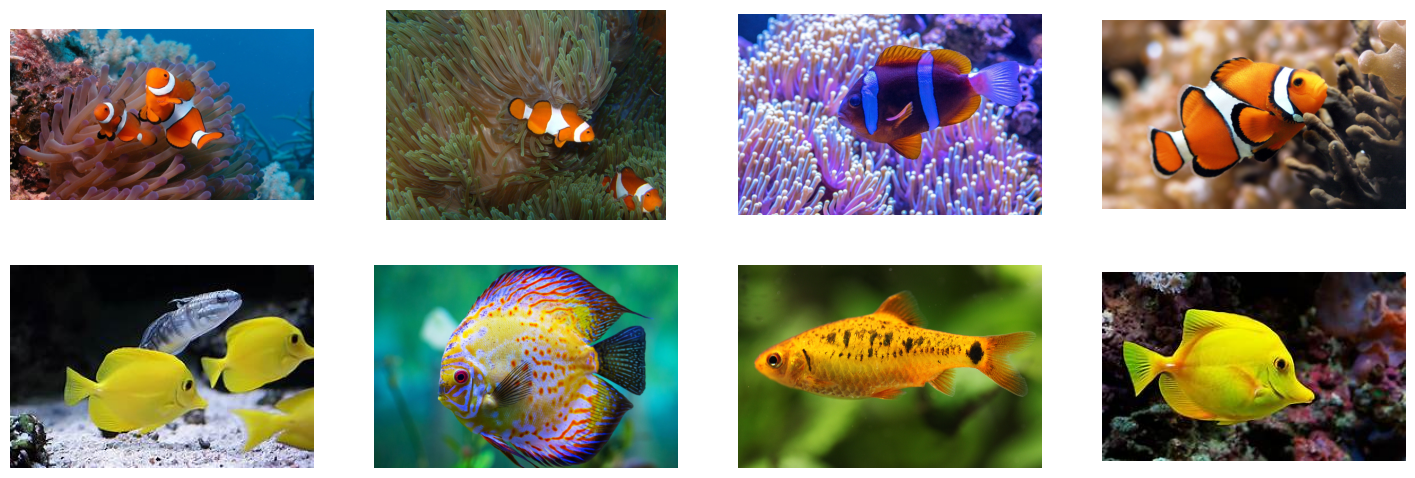

In [85]:
plt.figure(figsize=(18, 6))
for idx, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    plt.subplot(2,4,idx+1)
    plt.imshow(image)
    plt.axis('off')

In [96]:
model_vgg16             = tf.keras.applications.vgg16.VGG16()
model_vgg19             = tf.keras.applications.vgg19.VGG19()
model_resnet50          = tf.keras.applications.resnet50.ResNet50()
model_inception_v3      = tf.keras.applications.inception_v3.InceptionV3()

In [87]:
def process_images(model, image_paths, size, preprocess_input, display_top_k=False, top_k=2):

    plt.figure(figsize=(20,6))
    for idx, image_path in enumerate(image_paths):

        # Read the image using TensorFlow.
        tf_image = tf.io.read_file(image_path)

        # Decode the above `tf_image` from a Bytes string to a numeric Tensor.
        decoded_image = tf.image.decode_image(tf_image)

        # Resize the image to the spatial size required by the model.
        image_resized = tf.image.resize(decoded_image, size)

        # Add a batch dimension to the first axis (required).
        image_batch = tf.expand_dims(image_resized, axis=0)

        # Pre-process the input image.
        image_batch = preprocess_input(image_batch)

        # Forward pass through the model to make predictions.
        preds = model.predict(image_batch)

        # Decode (and rank the top-k) predictions.
        # Returns a list of tuples: (class ID, class description, probability)
        decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(
            preds=preds,
            top=5
        )

        if display_top_k == True:
            for jdx in range(top_k):
                print("Top {} predicted class:   Pr(Class={:20} [index={:4}]) = {:5.2f}".format(
                    jdx + 1, decoded_preds[0][jdx][1], jdx, decoded_preds[0][jdx][2] * 100))

        plt.subplot(2,4,idx+1)
        plt.imshow(decoded_image)
        plt.axis('off')
        label = decoded_preds[0][0][1]
        score = decoded_preds[0][0][2] * 100
        title = label + ' ' + str('{:.2f}%'.format(score))
        plt.title(title, fontsize=16)

## VGG16 Model

1/1 [==============================] - 1s 842ms/step


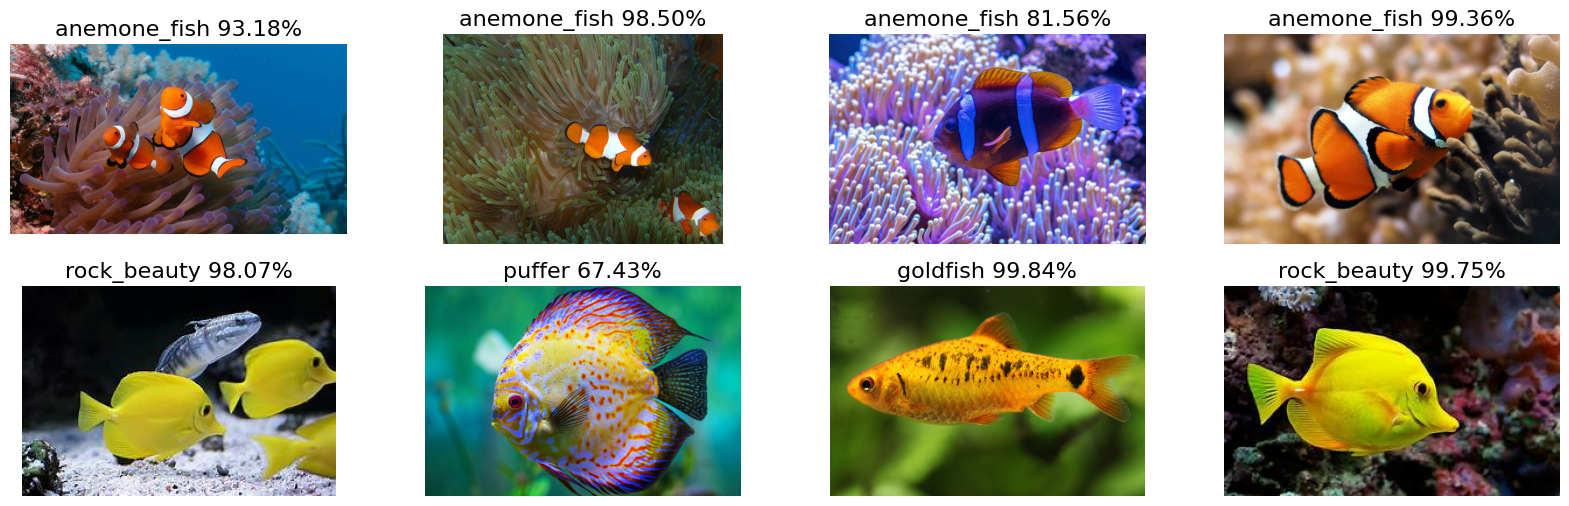

In [88]:
model = model_vgg16
size = (224, 224)

preprocess_input = tf.keras.applications.vgg16.preprocess_input

process_images(model, image_paths, size, preprocess_input)

## VGG19 Model

1/1 [==============================] - 1s 733ms/step


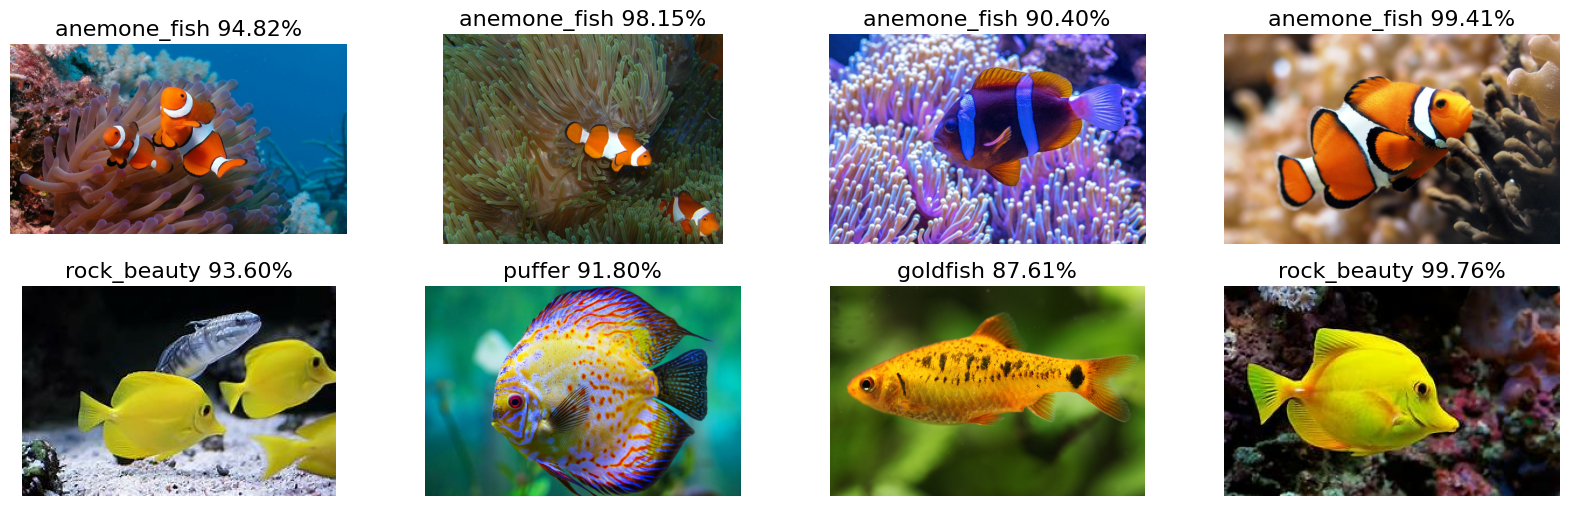

In [92]:
model = model_vgg19
size = (224, 224)

preprocess_input = tf.keras.applications.resnet50.preprocess_input

process_images(model, image_paths, size, preprocess_input)

## ResNet50

1/1 [==============================] - 0s 303ms/step


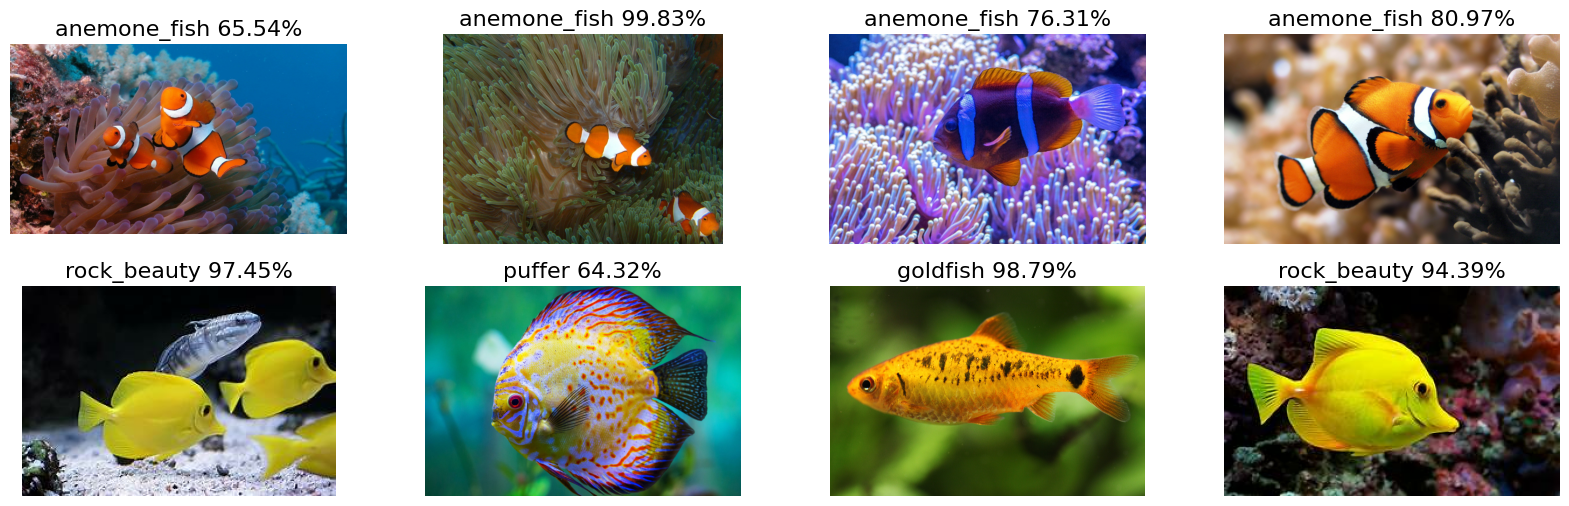

In [89]:
model = model_resnet50
size = (224, 224)

preprocess_input = tf.keras.applications.resnet50.preprocess_input

process_images(model, image_paths, size, preprocess_input)

## Inception V3

1/1 [==============================] - 2s 2s/step
Top 1 predicted class:   Pr(Class=anemone_fish         [index=   0]) = 88.98
Top 2 predicted class:   Pr(Class=sea_anemone          [index=   1]) =  4.18
1/1 [==============================] - 0s 245ms/step
Top 1 predicted class:   Pr(Class=anemone_fish         [index=   0]) = 89.89
Top 2 predicted class:   Pr(Class=sea_anemone          [index=   1]) =  3.31
1/1 [==============================] - 0s 253ms/step
Top 1 predicted class:   Pr(Class=anemone_fish         [index=   0]) = 89.12
Top 2 predicted class:   Pr(Class=sea_anemone          [index=   1]) =  3.98
1/1 [==============================] - 0s 258ms/step
Top 1 predicted class:   Pr(Class=anemone_fish         [index=   0]) = 90.40
Top 2 predicted class:   Pr(Class=sea_anemone          [index=   1]) =  1.43
1/1 [==============================] - 0s 244ms/step
Top 1 predicted class:   Pr(Class=rock_beauty          [index=   0]) = 99.40
Top 2 predicted class:   Pr(Class=microwave  

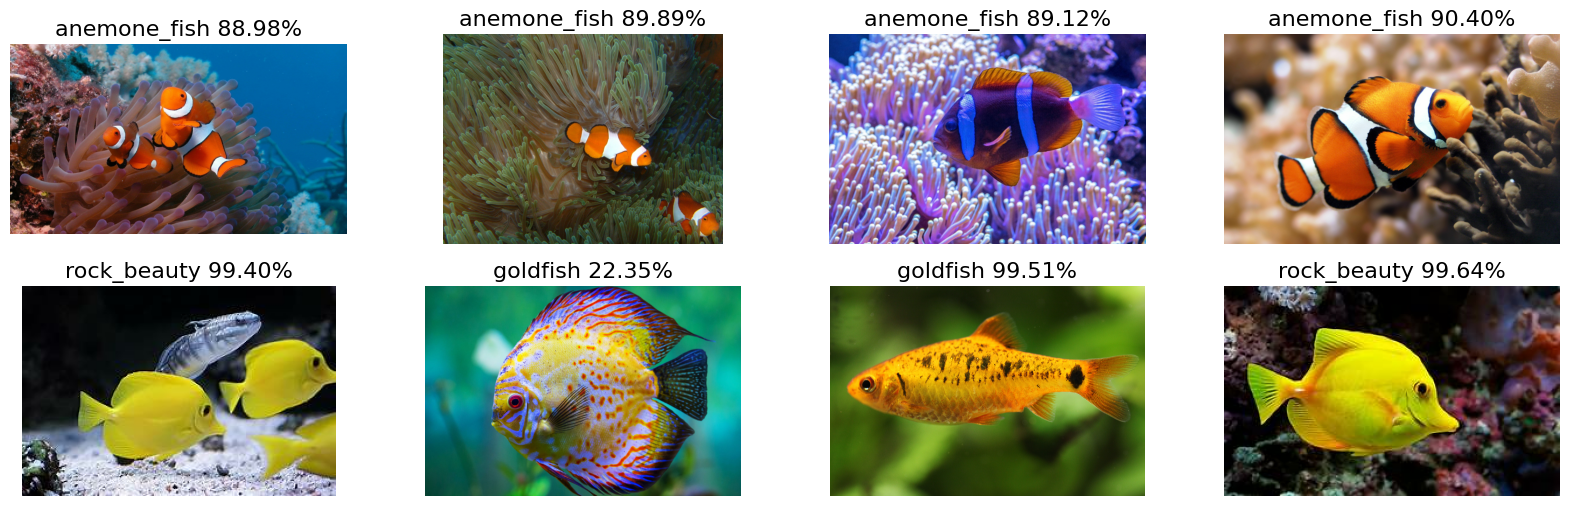

In [90]:
model = model_inception_v3
size = (299, 299)

preprocess_input = tf.keras.applications.inception_v3.preprocess_input

process_images(model, image_paths, size, preprocess_input, display_top_k=True)


From these sample images, it can be confirmed that VGG19 Model was the best out of the all the models.

References:

https://learnopencv.com/image-classification-pretrained-imagenet-models-tensorflow-keras/